In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("C:\\Users\\NAGESH V KATTIMANI\\OneDrive\\Documents\\Desktop\\Loan_prediction_practise\\loan-train.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Drop the Loan_ID column 
# as it is of no use for my model it is an extra source of info.
data = df.drop(columns=["Loan_ID"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
categorical_data = [i for i in data.columns if data[i].dtype=="object"]
categorical_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
numerical_data = [i for i in data.columns if data[i].dtype!="object"]
numerical_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
discrete_numerical_data = [i for i in numerical_data if len(data[i].unique())<16]
discrete_numerical_data

['Loan_Amount_Term', 'Credit_History']

###### We distinguish between discrete and continuous data because it helps us choose the suitable analysis, preprocessing techniques, and models for them.

In [11]:
continuous_numerical_data = [i for i in numerical_data if len(data[i].unique())>=16]
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

#### Data Visualisation

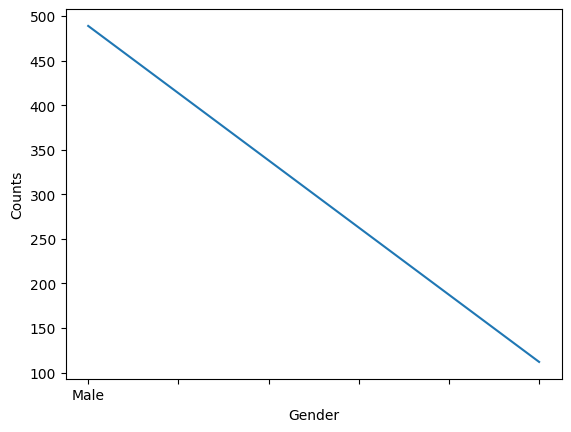

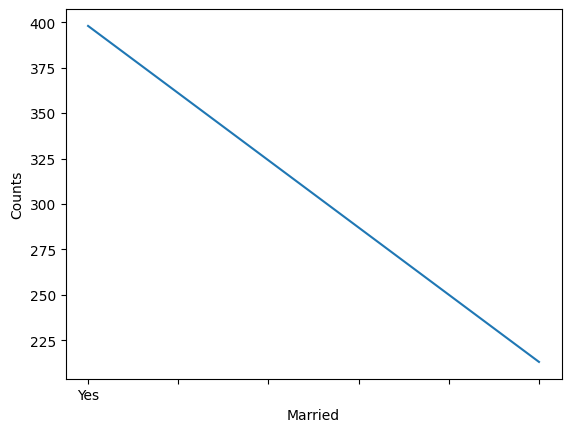

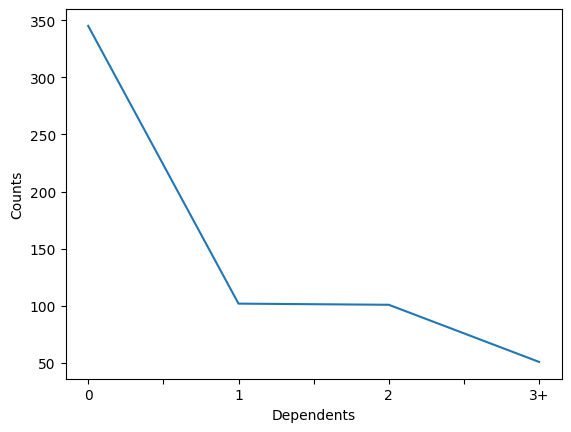

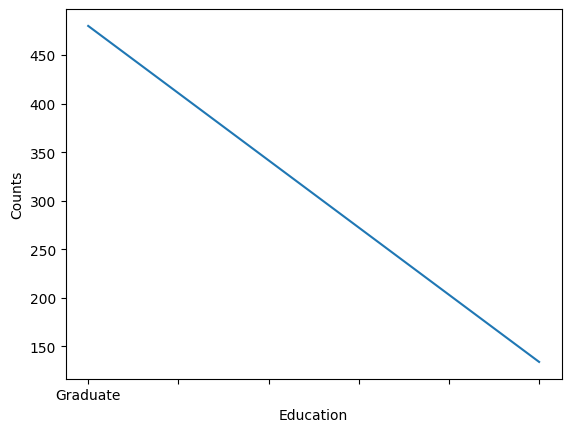

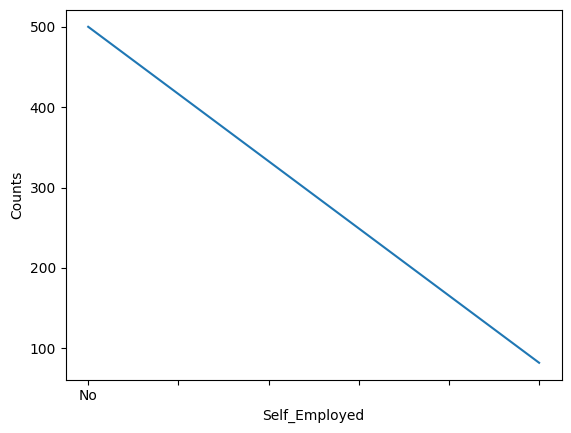

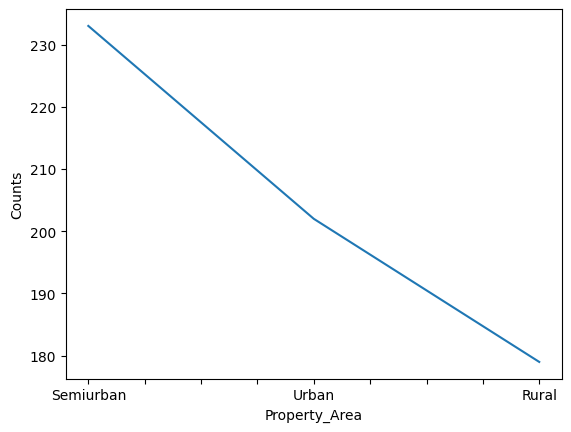

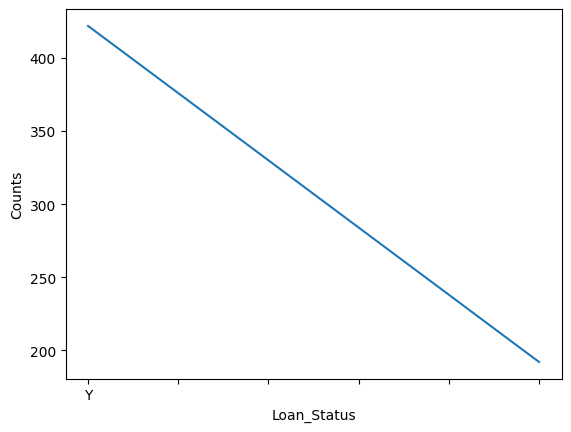

In [12]:
### For Categotical Data.
for i in categorical_data:
    data[i].value_counts().plot(kind="line")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

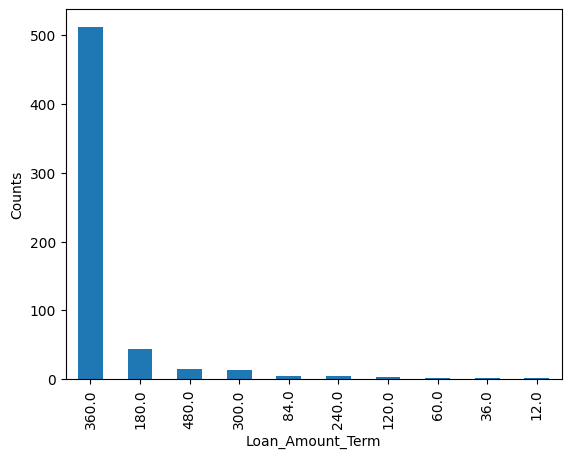

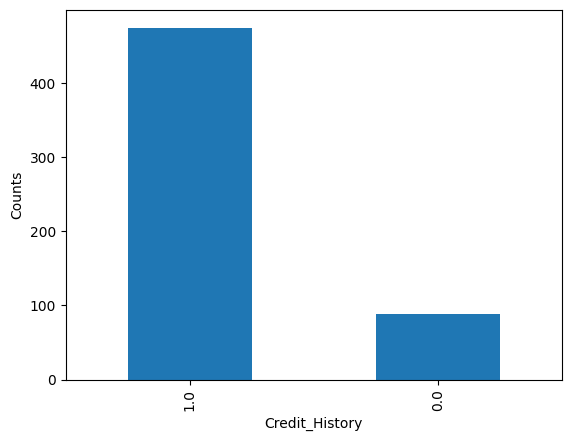

In [13]:
# For Discrete Numerical Data
for i in discrete_numerical_data:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

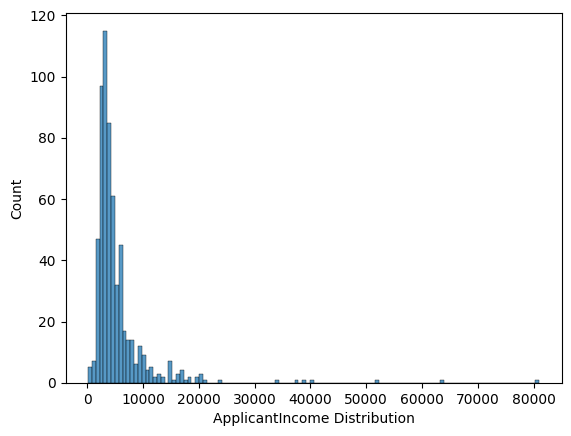

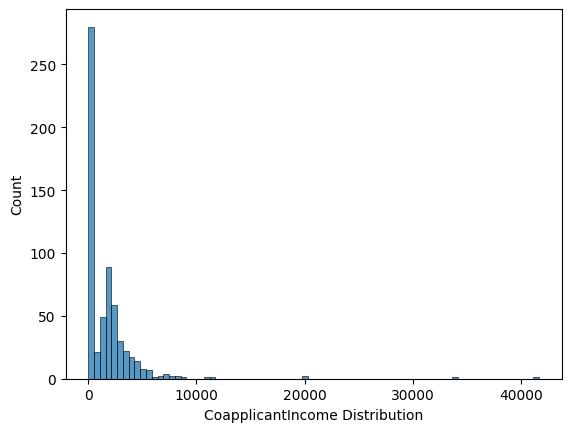

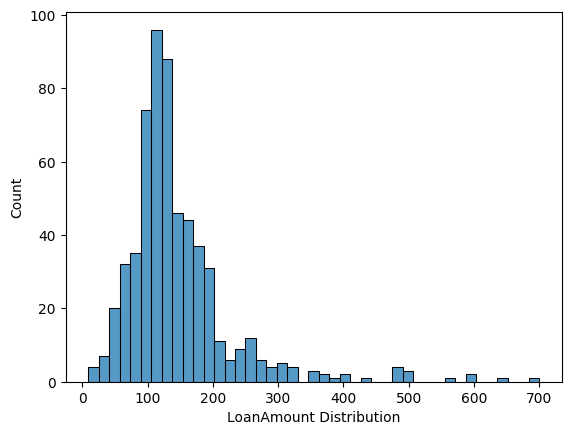

In [14]:
# For Continuous Numerical Data
for i in continuous_numerical_data:
    sns.histplot(data[i])
    plt.xlabel(i+" Distribution")
    plt.show()

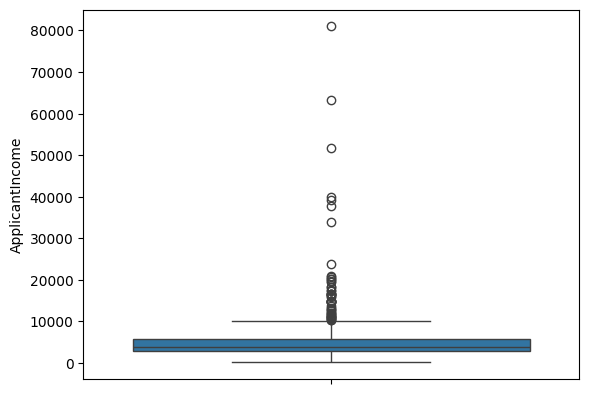

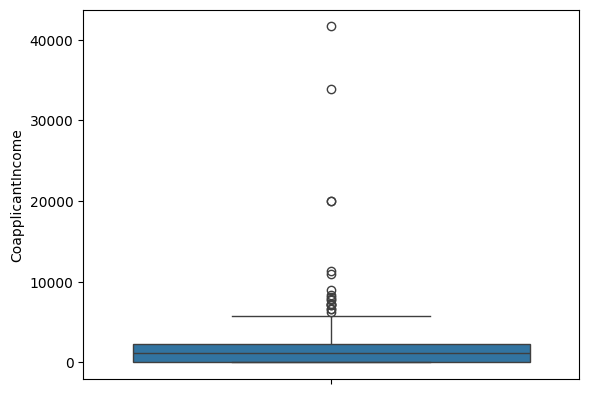

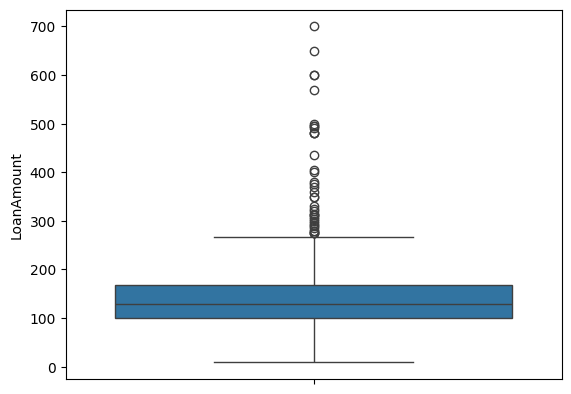

In [15]:
# Check for outliers(Since the above distribution graphs are skewed, hence outliers are present
for i in continuous_numerical_data:
    sns.boxplot(data = data, y=i)
    plt.show()

###### From the above box plot we can know that outliers are present, hence we need to handle missing values by replacing with median value.

## Handling Missing Values

<Axes: >

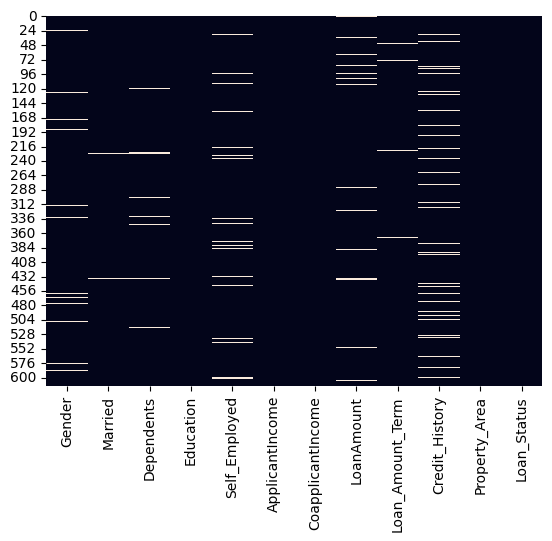

In [16]:
sns.heatmap(data.isnull(), cbar=False)

In [17]:
# Since there are null values in categorical values and discrete numerical values, so we replace them with mode of that feature.
for i in categorical_data+discrete_numerical_data:
    data[i] = data[i].fillna(data[i].mode().iloc[0])

In [18]:
# Now We replace the loan amount column from numerical category.
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())

<Axes: >

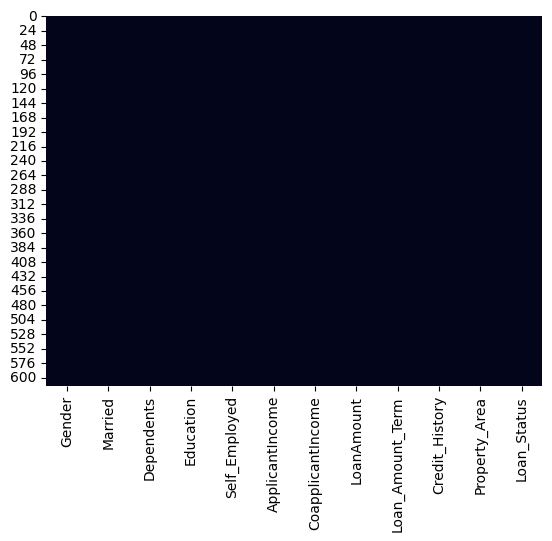

In [19]:
sns.heatmap(data.isnull(), cbar=False)

## Feature Engineering

In [20]:
# We will encode the categorical data using label Encoder.
le = preprocessing.LabelEncoder()

for i in categorical_data:
    data[i] = le.fit_transform(data[i])

In [21]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [22]:
# If we want to apply log transformation for all the numerical variables, then majority of CoapplicantIncome values are 0.
# Hence we will create a new variable called TotalIncome = ApplicantIncome + CoapplicantIncome.

data["TotalIncome"] = data["ApplicantIncome"]+data["CoapplicantIncome"]

In [23]:
data.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

In [24]:
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [25]:
continuous_numerical_data.remove("ApplicantIncome")
continuous_numerical_data.remove("CoapplicantIncome")
continuous_numerical_data.append("TotalIncome")

In [26]:
continuous_numerical_data

['LoanAmount', 'TotalIncome']

In [27]:
# Log Transformation
for i in continuous_numerical_data+["Loan_Amount_Term"]:
    data[i] = np.log(data[i])

In [28]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,4.852030,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,8.699515


## Model Building

In [29]:
# Splitting the data.

In [30]:
X,y = data.drop(columns = "Loan_Status"),data["Loan_Status"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Logistic Regression
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
print("Accuracy of Logistic Regression Model is ",model.score(X_test,y_test)*100)

Accuracy of Logistic Regression Model is  79.80295566502463


In [35]:
score = cross_val_score(model, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 80.9462881514061


In [36]:
y_pred=model.predict(X_test)

In [53]:
from sklearn.metrics import f1_score
print("f1 score of the model is:",f1_score(y_pred,y_test))

f1 score of the model is: 0.862876254180602


In [58]:
import pickle
#open a file, where you want to store the data
file = open('model.pkl', 'wb')

# #dump information to that file
pickle.dump(model, file)

In [59]:
import os
# Ensure the 'models' folder exists
os.makedirs('models', exist_ok=True)

file = open('models/model.pkl', 'wb')
